In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('kaggle_data/new-york-city-taxi-fare-prediction/train.csv', nrows=1000000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df = df.loc[:, 'fare_amount': 'pickup_datetime']
df.head()

,fare_amount,pickup_datetime
0,4.5,2009-06-15 17:26:21 UTC
1,16.9,2010-01-05 16:52:16 UTC
2,5.7,2011-08-18 00:35:00 UTC
3,7.7,2012-04-21 04:30:42 UTC
4,5.3,2010-03-09 07:51:00 UTC


In [6]:
df['pickup_datetime'].isnull().sum()

0

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
df['pickup_datetime'].head()

0   2009-06-15 17:26:21
1   2010-01-05 16:52:16
2   2011-08-18 00:35:00
3   2012-04-21 04:30:42
4   2010-03-09 07:51:00
Name: pickup_datetime, dtype: datetime64[ns]

In [8]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['year'] = df['pickup_datetime'].dt.year

df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010


In [9]:
df[df['year'] == 2012].head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012
6,7.5,2012-11-20 20:35:00,20,20,11,1,2012
7,16.5,2012-01-04 17:22:00,17,4,1,2,2012
8,9.0,2012-12-03 13:10:00,13,3,12,0,2012
10,5.3,2012-04-08 07:30:50,7,8,4,6,2012


Text(0, 0.5, 'Fare')

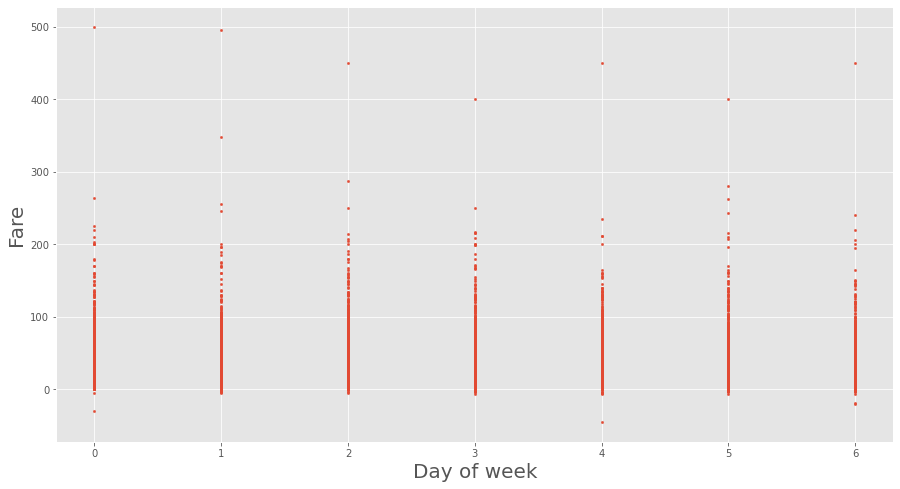

In [10]:
plt.figure(figsize=(15, 8))
plt.scatter(df['dayofweek'], df['fare_amount'], s=5)
plt.xlabel('Day of week', fontsize=20)
plt.ylabel('Fare', fontsize=20)

Text(0, 0.5, 'Frequency')

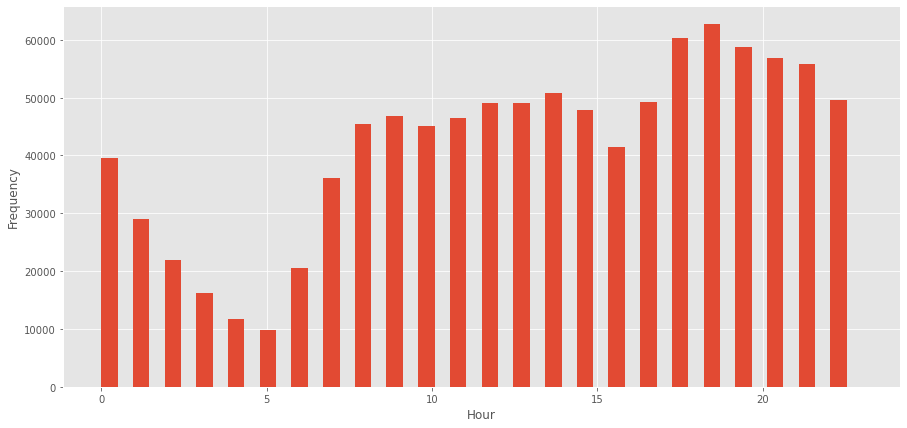

In [15]:
plt.figure(figsize=(15, 7))
plt.hist(df['hour'], bins=len(df['hour'].value_counts()), width=0.5)
plt.xlabel('Hour')
plt.ylabel('Frequency')

In [19]:
import datetime as dt

df['dropoff_datetime'] = df['pickup_datetime'] + dt.timedelta(minutes=30)
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,0 days 00:30:00
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,0 days 00:30:00
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,0 days 00:30:00
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,0 days 00:30:00
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,0 days 00:30:00


In [22]:
df['ride_time_m'] = (df['dropoff_datetime'] - df['pickup_datetime']).astype('timedelta64[m]')
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0


In [31]:
def judge_holiday(dayofweek):
    return np.where((dayofweek == 5) | (dayofweek == 6), 1, 0)

In [32]:
df['holiday'] = judge_holiday(df['dayofweek'])
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m,holiday
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0


In [33]:
def judge_next_day_is_holiday(dayofweek):
    return np.where((dayofweek + 1 == 5) | (dayofweek + 1 == 6), 1, 0)

In [34]:
df['next_day_is_holiday'] = judge_holiday(df['dayofweek'])
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m,holiday,next_day_is_holiday
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0,0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0,0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0,0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1,1
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0,0


In [36]:
def judge_season(month):
    if 3 <= month <= 5:
        return 0
    elif 6 <= month <= 8:
        return 1
    elif 9 <= month <= 11:
        return 2
    else:
        return 3

In [38]:
df['season'] = df['month'].apply(judge_season)
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m,holiday,next_day_is_holiday,season
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0,0,1
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0,0,3
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0,0,1
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1,1,0
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0,0,0
